# **READING THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
for dirname, _, filenames in os.walk('/kaggle/input/sentiment-images-classifier/Sentiment classifier'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

main_folder = "/kaggle/input/sentiment-images-classifier/6 Emotions for image classification"
classes = os.listdir(main_folder)

data = []
labels = []

target_size = (224, 224)

for class_name in classes:
    class_folder = os.path.join(main_folder, class_name)
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        # Open image using PIL
        image = Image.open(image_path)
        # Resize image
        image = image.resize(target_size)
        # Convert image to numpy array
        image_array = np.array(image)
        if len(image_array.shape) == 3 and image_array.shape[2] == 3:
            data.append(image_array)
            labels.append(class_name)
        else:
            print("Skipping image:", image_path, "as it does not have 3 channels")

data = np.array(data)
labels = np.array(labels)

print("Shape of data array:", data.shape)
print("Shape of labels array:", labels.shape)

Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear/pic92.jpg as it does not have 3 channels
Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear/ad963f5cc12f983d8367588d3b156a33--dark-eyes-horror-films.jpg as it does not have 3 channels
Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear/panico-540x361.png as it does not have 3 channels
Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear/photodune-3175666-fear-m.jpg as it does not have 3 channels
Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/sad/d2d5cb4e2792daba9680d721e737f0ef4.jpg as it does not have 3 channels
Skipping image: /kaggle/input/sentiment-images-classifier/6 Emotions for image classification/sad/4ca85a8078ecffeb4e8258f3635451a2.jpg as it does not have 3 channels
Skipping image: /kaggle/inpu

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import warnings
warnings.filterwarnings("ignore")

2024-05-12 16:09:04.934232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 16:09:04.934339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 16:09:05.078452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **DATA VISUALISATION**

# #  **BAR GRAPH**

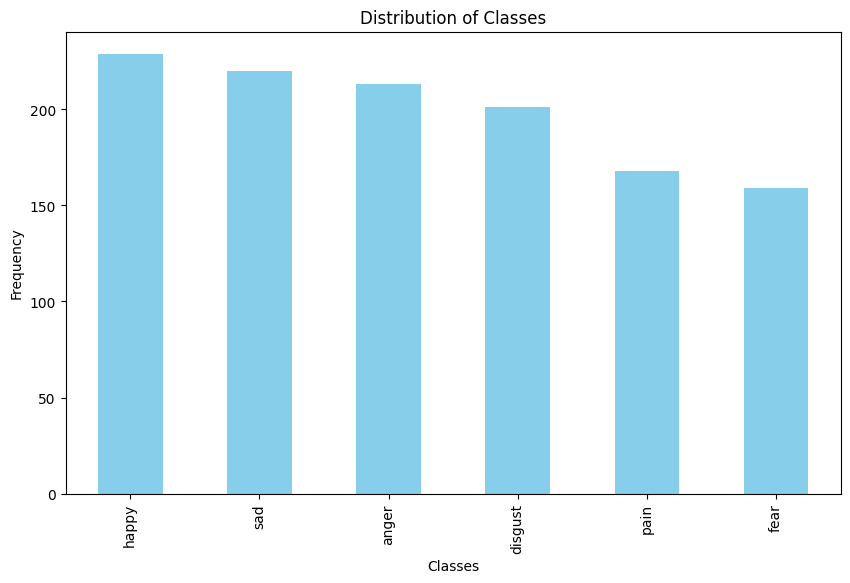

In [ ]:
labels_series = pd.Series(labels, name='Class')
plt.figure(figsize=(10, 6))
labels_series.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

# # **HISTOGRAM**

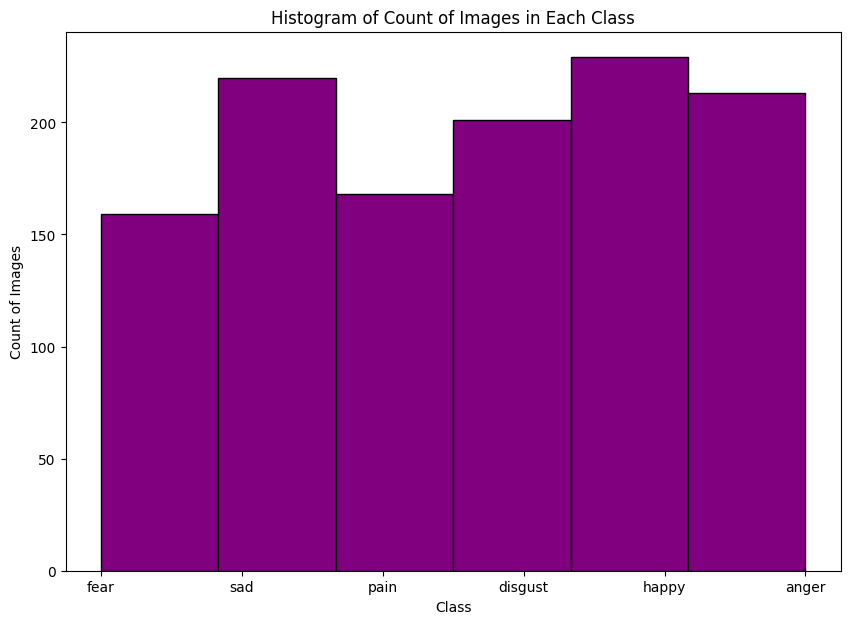

In [ ]:
class_counts = labels_series.value_counts()
plt.figure(figsize=(10, 7))
plt.hist(labels, bins=len(labels_series.unique()), color='purple', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Histogram of Count of Images in Each Class')
plt.show()

# # **PIE CHART**

In [ ]:
labels_series = pd.Series(labels, name='Class')
class_counts = labels_series.value_counts()
class_counts = class_counts.sort_index()

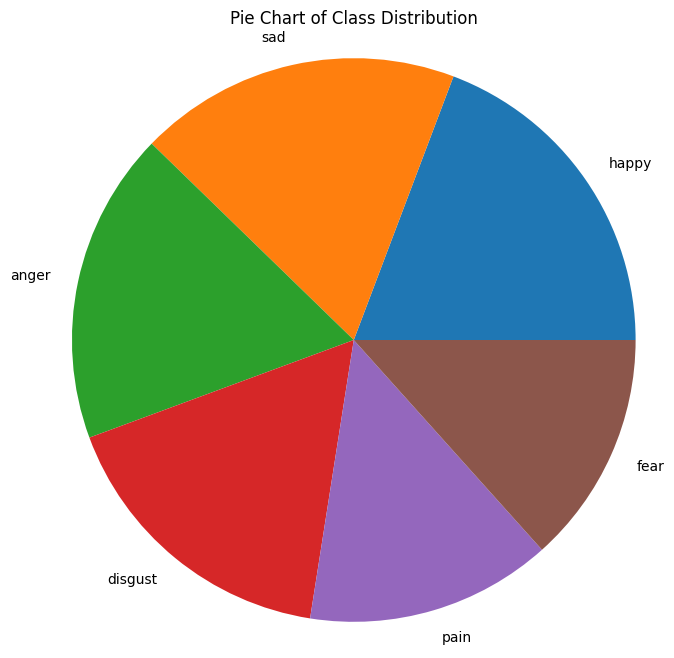

In [ ]:
class_counts = labels_series.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index)
plt.title('Pie Chart of Class Distribution')
plt.axis('equal')
plt.show()

# # **LINE GRAPH**

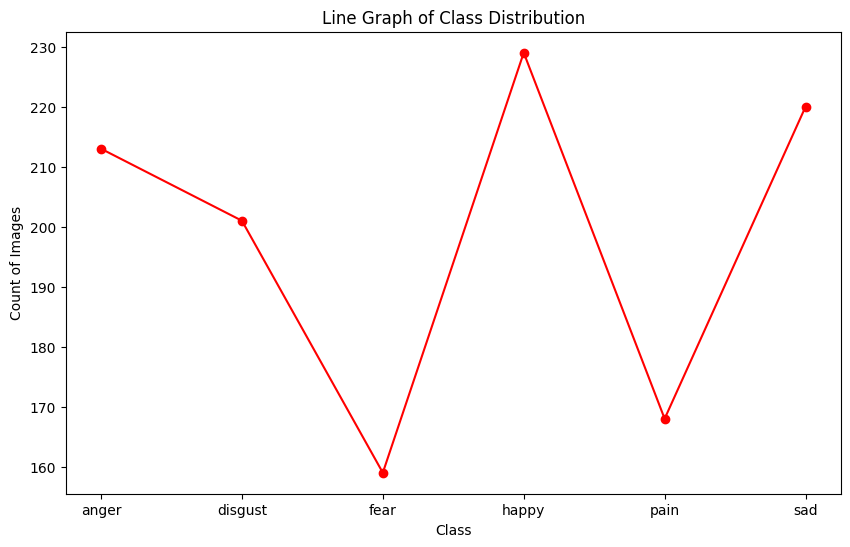

In [ ]:
class_counts = class_counts.sort_index()
plt.figure(figsize=(10, 6))
plt.plot(class_counts.index, class_counts.values, marker='o', color='red')
plt.title('Line Graph of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.show()

# # **SCATTER PLOT**

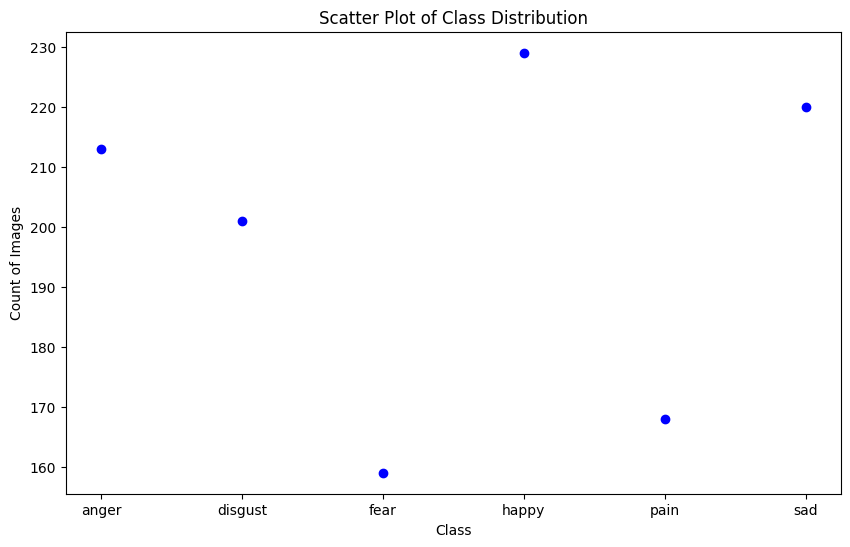

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(class_counts.index, class_counts.values, color='blue')
plt.title('Scatter Plot of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.show()

# **CHECKING FOR CLASS IMBALANCEMENT**

In [ ]:
imbalance_threshold = 1.5 # Set a threshold for imbalance
is_imbalanced = any((class_counts / len(labels)) > imbalance_threshold)
if is_imbalanced:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


The dataset is balanced.


# **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
data = np.array(data)         #ensuring that the images and their respective labels are in form of array so easily can be used
labels = np.array(labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_val, y_train, y_val = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Number of classes
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))



Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_282 (Conv2D)             │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_282               │ (None, 111, 111, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_283 (Conv2D)             │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_283               │ (None, 54, 54, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_284 (Conv2D)             │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_284               │ (None, 26, 26, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_285 (Conv2D)             │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_285               │ (None, 12, 12, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_96 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,681,606 (36.93 MB)

 Trainable params: 9,681,606 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-05-08 20:42:31.411427: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-05-08 20:42:31.411490: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-05-08 20:42:31.411500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-05-08 20:42:31.411508: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-05-08 20:42:31.411516: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 7.43913, expected 6.51753
2024-05-08 20:42:31.411524: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 7.1783, expected 6.25671
2024-05-08 20:42:31.411532: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.06838, expected 5.14679
2024-05-08 20:42:31.411539: E 

28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1546 - loss: 133.4972

2024-05-08 20:42:38.222766: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50793: 5.00665, expected 4.36863
2024-05-08 20:42:38.222825: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 51207: 4.96433, expected 4.32631
2024-05-08 20:42:38.222839: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 52287: 5.35377, expected 4.71575
2024-05-08 20:42:38.222847: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 52293: 5.12431, expected 4.48629
2024-05-08 20:42:38.222860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53572: 5.29457, expected 4.65655
2024-05-08 20:42:38.222869: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53970: 5.25555, expected 4.61753
2024-05-08 20:42:38.222886: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 56000: 5.37157, expected 4.73355
2024-05-08 20:42:38.222899:

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 355ms/step - accuracy: 0.1571 - loss: 143.8768 - val_accuracy: 0.2353 - val_loss: 1116.8690
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2929 - loss: 91.5648 - val_accuracy: 0.2395 - val_loss: 1606.2910
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2316 - loss: 1.7616 - val_accuracy: 0.2353 - val_loss: 2.1343
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2408 - loss: 1.8083 - val_accuracy: 0.2269 - val_loss: 1.7769
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2375 - loss: 1.8179 - val_accuracy: 0.2353 - val_loss: 2.1529
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2404 - loss: 1.6974 - val_accuracy: 0.2227 - val_loss: 1.7792
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2350 - loss: 1.7325 - val_accuracy: 0.2227 - val_loss: 1.8461
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2057 - loss: 1.7353 - val_accuracy: 0.2269 - v

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(" Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
 Overall Accuracy: 0.22268907563025211
Precision: 0.19469246031746032
Recall: 0.19446212978683267
F1 Score: 0.10846316325154202


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Metrics:")
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"Class: {class_name}")
    print(f"  Sensitivity (Recall): {sensitivity[idx]}")
    print(f"  Specificity: {specificity[idx]}")
    print(f"  Precision: {precision[idx]}")
    print(f"  Accuracy: {accuracy[idx]}")
    print()

Classification Report:
              precision    recall  f1-score   support

       anger       0.33      0.03      0.05        38
     disgust       0.00      0.00      0.00        39
        fear       0.62      0.16      0.26        31
       happy       0.21      0.98      0.35        48
        pain       0.00      0.00      0.00        34
         sad       0.00      0.00      0.00        48

    accuracy                           0.22       238
   macro avg       0.19      0.19      0.11       238
weighted avg       0.18      0.22      0.11       238

Metrics:
Class: anger
  Sensitivity (Recall): 0.02631578947368421
  Specificity: 0.99
  Precision: 0.3333333333333333
  Accuracy: 0.8361344537815126

Class: disgust
  Sensitivity (Recall): 0.0
  Specificity: 1.0
  Precision: nan
  Accuracy: 0.8361344537815126

Class: fear
  Sensitivity (Recall): 0.16129032258064516
  Specificity: 0.9855072463768116
  Precision: 0.625
  Accuracy: 0.8781512605042017

Class: happy
  Sensitivity (Reca

# **DATA AUGMENTATION (PRE PROCESSING)**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the image randomly by up to 20 degrees
    width_shift_range=0.1,   # Shift the image horizontally by up to 10% of its width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of its height
    shear_range=0.2,         # Apply shear transformation with a maximum shear intensity of 0.2
    zoom_range=0.2,          # Zoom into the image by up to 20%
    horizontal_flip=True,    # Flip the image horizontally (left to right) randomly
    fill_mode='nearest'      # Fill in any empty pixels generated during transformation with the nearest pixel value
)
augmented_data = []
augmented_labels = []
for i in range(len(data)):
    img = data[i]
    label = labels[i]
    img = img.reshape((1,) + img.shape)
    j = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_data.append(batch[0])
        augmented_labels.append(label)
        j += 1
        if j >= 5:  # apply augmentation 5 times for each image
            break
# Convert augmented data and labels to numpy arrays
augmented_data = np.concatenate((data, augmented_data))
augmented_labels = np.concatenate((labels, augmented_labels))
print("Shape of concatenated data array:", augmented_data.shape)
print("Shape of concatenated labels array:", augmented_labels.shape)

Shape of concatenated data array: (7140, 224, 224, 3)
Shape of concatenated labels array: (7140,)


# **CONVOLUTIONAL NEURAL NETWORK ON AUGMENTED DATASET**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
augmedted_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(augmented_labels)
X_train, X_val, y_train, y_val = train_test_split(augmented_data, encoded_labels, test_size=0.2, random_state=42)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(np.unique(augmented_labels)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,681,606 (36.93 MB)

 Trainable params: 9,681,606 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-05-11 20:33:21.385373: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-05-11 20:33:21.385426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-05-11 20:33:21.385439: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-05-11 20:33:21.385453: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-05-11 20:33:21.385472: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 7.43913, expected 6.51753
2024-05-11 20:33:21.385485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 7.1783, expected 6.25671
2024-05-11 20:33:21.385499: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.06838, expected 5.14679
2024-05-11 20:33:21.385510: E 

  5/179 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.1384 - loss: 182.1373

I0000 00:00:1715459607.361227     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


177/179 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1911 - loss: 27.2417

2024-05-11 20:33:33.027659: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148273: 4.10347, expected 3.58648
2024-05-11 20:33:33.027728: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149075: 3.91455, expected 3.39756
2024-05-11 20:33:33.027737: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149093: 3.88055, expected 3.36356
2024-05-11 20:33:33.027746: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 4.10975, expected 3.59276
2024-05-11 20:33:33.027756: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149850: 3.98709, expected 3.4701
2024-05-11 20:33:33.027773: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 151973: 3.89678, expected 3.37979
2024-05-11 20:33:33.027785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 153061: 4.10204, expected 3.58504
2024-05-11 20:33:33.0

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1912 - loss: 27.0223

2024-05-11 20:33:40.103452: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.63812, expected 5.86815
2024-05-11 20:33:40.103508: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.57545, expected 5.80549
2024-05-11 20:33:40.103518: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.58905, expected 5.81908
2024-05-11 20:33:40.103525: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.3889, expected 5.61894
2024-05-11 20:33:40.103533: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.23839, expected 5.46843
2024-05-11 20:33:40.103541: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.97291, expected 4.20294
2024-05-11 20:33:40.103549: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.35322, expected 4.58326
2024-05-11 20:33:40.103556: E external/local_xla/xla/

179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - accuracy: 0.1912 - loss: 26.9143 - val_accuracy: 0.1905 - val_loss: 706.9451
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2451 - loss: 1.7331 - val_accuracy: 0.2409 - val_loss: 754.3755
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2581 - loss: 1.6966 - val_accuracy: 0.2493 - val_loss: 750.8631
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2788 - loss: 1.6517 - val_accuracy: 0.2423 - val_loss: 920.3619
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.3116 - loss: 1.5939 - val_accuracy: 0.2563 - val_loss: 999.5759
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3199 - loss: 1.5833 - val_accuracy: 0.2381 - val_loss: 1058.1230
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3286 - loss: 1.5411 - val_accuracy: 0.2528 - val_loss: 1386.2527
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3779 - loss: 1.4588 - v

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(" Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
 Overall Accuracy: 0.25770308123249297
Precision: 0.27658896258134885
Recall: 0.25249975057461954
F1 Score: 0.23412480319216267


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Metrics:")
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"Class: {class_name}")
    print(f"  Sensitivity (Recall): {sensitivity[idx]}")
    print(f"  Specificity: {specificity[idx]}")
    print(f"  Precision: {precision[idx]}")
    print(f"  Accuracy: {accuracy[idx]}")
    print()

Classification Report:
              precision    recall  f1-score   support

       anger       0.26      0.11      0.16       239
     disgust       0.26      0.40      0.32       228
        fear       0.34      0.20      0.25       211
       happy       0.22      0.28      0.25       269
        pain       0.33      0.06      0.11       223
         sad       0.25      0.46      0.32       258

    accuracy                           0.26      1428
   macro avg       0.28      0.25      0.23      1428
weighted avg       0.27      0.26      0.24      1428

Metrics:
Class: anger
  Sensitivity (Recall): 0.11297071129707113
  Specificity: 0.9352396972245585
  Precision: 0.25961538461538464
  Accuracy: 0.7976190476190477

Class: disgust
  Sensitivity (Recall): 0.3991228070175439
  Specificity: 0.7875
  Precision: 0.2630057803468208
  Accuracy: 0.7254901960784313

Class: fear
  Sensitivity (Recall): 0.2037914691943128
  Specificity: 0.9309778142974527
  Precision: 0.33858267716535434
  A

# **TUNING THE HYPER PARAMETERS**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(augmented_labels)
X_train, X_val, y_train, y_val = train_test_split(augmented_data, encoded_labels, test_size=0.2, random_state=42)


In [ ]:
X=augmented_data
y=augmented_labels

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_val, y_train, y_val = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

img_width = 224
img_height = 224

def create_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for _ in range(num_layers):
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model
learning_rates = [0.1]
batch_sizes = [8,16]
num_epochs = 10
num_layers_options = [1, 2, 3]
dropout_rates = [0.2, 0.4, 0.6]

k_folds = 5
kf = KFold(n_splits=k_folds)

best_accuracy = 0
best_hyperparams = {}

for lr in learning_rates:
    for bs in batch_sizes:
        for num_layers in num_layers_options:
            for dropout_rate in dropout_rates:
                accuracies = []
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
                    # Convert labels to one-hot encoded vectors
                    y_train_fold = to_categorical(y_train_fold, 6)
                    y_val_fold = to_categorical(y_val_fold, 6)
                    model = create_model(num_layers, dropout_rate)
                    model.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=lr),
                                  metrics=['accuracy'])

                    history = model.fit(X_train_fold, y_train_fold,
                                        batch_size=bs,
                                        epochs=num_epochs,
                                        verbose=0,
                                        validation_data=(X_val_fold, y_val_fold))

                    val_accuracy = history.history['val_accuracy'][-1]
                    accuracies.append(val_accuracy)

                avg_accuracy = np.mean(accuracies)
                print(f'Learning Rate: {lr}, Batch Size: {bs}, Num Layers: {num_layers}, Dropout Rate: {dropout_rate}, Average Validation Accuracy: {avg_accuracy}')

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hyperparams['learning_rate'] = lr
                    best_hyperparams['batch_size'] = bs
                    best_hyperparams['num_layers'] = num_layers
                    best_hyperparams['dropout_rate'] = dropout_rate

print("Best Hyperparameters:")
print(best_hyperparams)

W0000 00:00:1715196082.936512     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196085.615564     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196095.309076     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196097.911592     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196107.707590     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196110.382812     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196120.120625     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196122.728997     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.18273353278636933


W0000 00:00:1715196144.714154     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196147.366588     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196157.618018     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196160.206915     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196169.968978     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196172.582562     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196182.255035     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196184.836253     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.17016257643699645


W0000 00:00:1715196206.867648     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196209.577579     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196219.248486     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196221.785335     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196231.498319     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196234.079080     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196243.821442     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196246.409206     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.1691099464893341
Learning Rate: 0.1, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.1659685879945755
Learning Rate: 0.1, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.16811242401599885
Learning Rate: 0.1, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.18176908195018768


W0000 00:00:1715196489.249353     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196494.376662     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196506.671863     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196511.954111     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196524.087266     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196529.281603     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196541.501659     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196546.746636     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.16704326272010803


W0000 00:00:1715196577.413381     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196582.748129     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196595.068130     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196600.365560     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196612.612377     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196617.877754     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196630.235186     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196635.561947     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.17864976227283477


W0000 00:00:1715196665.308222     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196670.600255     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196682.892317     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196688.143552     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196700.558106     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196706.003068     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196718.358579     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715196723.717025     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.1, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.6, Average Validation Accuracy: 0.17756957709789276
Learning Rate: 0.1, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.18178010284900664
Learning Rate: 0.1, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.1733149617910385
Learning Rate: 0.1, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.16701570451259612
Learning Rate: 0.1, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.161796635389328
Learning Rate: 0.1, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.17543124556541442
Learning Rate: 0.1, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.17857811748981475
Learning Rate: 0.1, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.16384679079055786
Learning Rate: 0.1, Batch Size: 16, Num Layers: 3, D

ValueError: Argument(s) not recognized: {'lr': 0.1}

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
img_width = 224
img_height = 224
def create_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for _ in range(num_layers):
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model
learning_rates = [0.001]
batch_sizes = [8, 16]
num_epochs = 10
num_layers_options = [1, 2, 3]
dropout_rates = [0.2, 0.4, 0.6]

k_folds = 5
kf = KFold(n_splits=k_folds)


best_accuracy = 0
best_hyperparams = {}

for lr in learning_rates:
    for bs in batch_sizes:
        for num_layers in num_layers_options:
            for dropout_rate in dropout_rates:
                accuracies = []
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
                    # Convert labels to one-hot encoded vectors
                    y_train_fold = to_categorical(y_train_fold, 6)
                    y_val_fold = to_categorical(y_val_fold, 6)
                    model = create_model(num_layers, dropout_rate)
                    model.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=lr),
                                  metrics=['accuracy'])

                    history = model.fit(X_train_fold, y_train_fold,
                                        batch_size=bs,
                                        epochs=num_epochs,
                                        verbose=0,
                                        validation_data=(X_val_fold, y_val_fold))

                    val_accuracy = history.history['val_accuracy'][-1]
                    accuracies.append(val_accuracy)

                avg_accuracy = np.mean(accuracies)
                print(f'Learning Rate: {lr}, Batch Size: {bs}, Num Layers: {num_layers}, Dropout Rate: {dropout_rate}, Average Validation Accuracy: {avg_accuracy}')

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hyperparams['learning_rate'] = lr
                    best_hyperparams['batch_size'] = bs
                    best_hyperparams['num_layers'] = num_layers
                    best_hyperparams['dropout_rate'] = dropout_rate

print("Best Hyperparameters:")
print(best_hyperparams)



2024-05-08 18:31:10.085632: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.188, expected 7.24213
2024-05-08 18:31:10.085696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.3942, expected 7.44833
2024-05-08 18:31:10.085706: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.80257, expected 6.8567
2024-05-08 18:31:10.085714: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.65586, expected 5.70999
2024-05-08 18:31:10.085722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.4636, expected 5.51773
2024-05-08 18:31:10.085748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.67221, expected 6.72634
2024-05-08 18:31:10.085757: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.85291, expected 5.90703
2024-05-08 18:31:10.085766: E external/local_xla/xla/service

Learning Rate: 0.001, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.19015706777572633


W0000 00:00:1715193138.691905     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193141.526048     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193151.816091     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193154.388481     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193164.129412     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193166.938907     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193177.235844     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193179.830492     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.001, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.17963075041770935


W0000 00:00:1715193202.057910     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193204.958888     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193214.690853     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193217.257477     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193227.011841     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193229.869097     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193239.690629     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193242.285773     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.001, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.17858362793922425
Learning Rate: 0.001, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.1775365114212036
Learning Rate: 0.001, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.19536511301994325
Learning Rate: 0.001, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.16599614322185516


W0000 00:00:1715193489.236744     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193494.844980     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193507.029208     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193512.146390     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193524.780932     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193530.486102     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193542.747335     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193547.928878     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.001, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.17861118614673616


W0000 00:00:1715193579.075396     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193584.890927     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193597.545293     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193603.363744     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193615.845449     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193621.341516     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193633.698132     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193638.952323     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.001, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.18387985825538636


W0000 00:00:1715193669.349899     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193675.162468     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193687.520899     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193692.674017     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193704.930725     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193710.450041     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193722.602348     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715193727.745700     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.001, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.6, Average Validation Accuracy: 0.1849214643239975


2024-05-08 18:42:34.392745: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148273: 4.10347, expected 3.58648
2024-05-08 18:42:34.392803: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149075: 3.91455, expected 3.39756
2024-05-08 18:42:34.392813: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149093: 3.88055, expected 3.36356
2024-05-08 18:42:34.392822: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 4.10975, expected 3.59276
2024-05-08 18:42:34.392831: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149850: 3.98709, expected 3.4701
2024-05-08 18:42:34.392848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 151973: 3.89678, expected 3.37979
2024-05-08 18:42:34.392860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 153061: 4.10204, expected 3.58504
2024-05-08 18:42:34.3

Learning Rate: 0.001, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.1723064213991165
Learning Rate: 0.001, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.19015706777572633
Learning Rate: 0.001, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.17334802746772765
Learning Rate: 0.001, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.1891375035047531
Learning Rate: 0.001, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.1690823942422867
Learning Rate: 0.001, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.17651695013046265
Learning Rate: 0.001, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.18070543110370635
Learning Rate: 0.001, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.17329842746257781
Learning Rate: 0.001, Batch Size: 1

NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

img_width = 224
img_height = 224
def create_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for _ in range(num_layers):
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model
learning_rates = [0.01]
batch_sizes = [8, 16]
num_epochs = 10
num_layers_options = [1, 2, 3]
dropout_rates = [0.2, 0.4, 0.6]
k_folds = 5
kf = KFold(n_splits=k_folds)
best_accuracy = 0
best_hyperparams = {}

for lr in learning_rates:
    for bs in batch_sizes:
        for num_layers in num_layers_options:
            for dropout_rate in dropout_rates:
                accuracies = []
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
                    # Convert labels to one-hot encoded vectors
                    y_train_fold = to_categorical(y_train_fold, 6)
                    y_val_fold = to_categorical(y_val_fold, 6)
                    model = create_model(num_layers, dropout_rate)
                    model.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=lr),
                                  metrics=['accuracy'])

                    history = model.fit(X_train_fold, y_train_fold,
                                        batch_size=bs,
                                        epochs=num_epochs,
                                        verbose=0,
                                        validation_data=(X_val_fold, y_val_fold))

                    val_accuracy = history.history['val_accuracy'][-1]
                    accuracies.append(val_accuracy)

                avg_accuracy = np.mean(accuracies)
                print(f'Learning Rate: {lr}, Batch Size: {bs}, Num Layers: {num_layers}, Dropout Rate: {dropout_rate}, Average Validation Accuracy: {avg_accuracy}')

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hyperparams['learning_rate'] = lr
                    best_hyperparams['batch_size'] = bs
                    best_hyperparams['num_layers'] = num_layers
                    best_hyperparams['dropout_rate'] = dropout_rate

print("Best Hyperparameters:")
print(best_hyperparams)



2024-05-08 20:05:38.990858: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.188, expected 7.24213
2024-05-08 20:05:38.990919: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.3942, expected 7.44833
2024-05-08 20:05:38.990928: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.80257, expected 6.8567
2024-05-08 20:05:38.990936: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.65586, expected 5.70999
2024-05-08 20:05:38.990944: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.4636, expected 5.51773
2024-05-08 20:05:38.990952: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.67221, expected 6.72634
2024-05-08 20:05:38.990960: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.85291, expected 5.90703
2024-05-08 20:05:38.990968: E external/local_xla/xla/service

Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.21738770604133606


W0000 00:00:1715198807.904305     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198810.836751     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198820.596549     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198823.229129     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198833.644830     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198836.451516     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198846.174665     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198848.781141     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.19854505360126495


W0000 00:00:1715198872.134350     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198875.005078     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198884.750914     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198887.323084     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198897.167985     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198900.008374     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198910.644155     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715198913.259287     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.18906034529209137
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.18697161674499513
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.16914852559566498
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.18387434482574463


W0000 00:00:1715199160.993522     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199166.568304     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199178.804958     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199183.767611     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199195.736572     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199201.502011     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199214.005065     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199219.641169     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.16703224182128906


W0000 00:00:1715199250.127275     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199255.623560     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199268.086074     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199273.701649     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199285.971139     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199291.594716     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199305.090376     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199310.434958     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.17440617084503174


W0000 00:00:1715199340.535706     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199345.970699     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199358.165442     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199363.237682     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199375.954952     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199381.508656     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199393.639284     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199398.842010     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.6, Average Validation Accuracy: 0.186999174952507


2024-05-08 20:17:04.296715: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148273: 4.10347, expected 3.58648
2024-05-08 20:17:04.296772: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149075: 3.91455, expected 3.39756
2024-05-08 20:17:04.296782: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149093: 3.88055, expected 3.36356
2024-05-08 20:17:04.296791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 4.10975, expected 3.59276
2024-05-08 20:17:04.296801: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149850: 3.98709, expected 3.4701
2024-05-08 20:17:04.296817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 151973: 3.89678, expected 3.37979
2024-05-08 20:17:04.296830: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 153061: 4.10204, expected 3.58504
2024-05-08 20:17:04.2

Learning Rate: 0.01, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.2038192331790924
Learning Rate: 0.01, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.20489391088485717
Learning Rate: 0.01, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.19124276638031007
Learning Rate: 0.01, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.16599062979221343
Learning Rate: 0.01, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.16913750171661376
Learning Rate: 0.01, Batch Size: 16, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.1796913743019104


W0000 00:00:1715199796.230245     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199801.202892     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199801.864829     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199813.362436     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199817.850195     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199818.421343     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199829.461180     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199835.113709     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.1859465390443802


W0000 00:00:1715199878.736038     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199883.521504     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199884.080095     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199896.840430     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199901.324366     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199901.915396     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199913.058321     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199918.463864     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.1754422664642334


W0000 00:00:1715199962.707134     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199967.638291     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199968.186254     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199979.313901     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199983.832896     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199984.375540     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715199995.631820     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715200001.111094     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 16, Num Layers: 3, Dropout Rate: 0.6, Average Validation Accuracy: 0.17334802746772765
Best Hyperparameters:
{'learning_rate': 0.01, 'batch_size': 8, 'num_layers': 1, 'dropout_rate': 0.2}


NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

img_width = 224
img_height = 224
def create_model(num_layers, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for _ in range(num_layers):
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model
learning_rates = [0.01]
batch_sizes = [8, 16]
num_epochs = 10
num_layers_options = [1, 2, 3]
dropout_rates = [0.2, 0.4, 0.6]

k_folds = 5
kf = KFold(n_splits=k_folds)

best_accuracy = 0
best_hyperparams = {}

for lr in learning_rates:
    for bs in batch_sizes:
        for num_layers in num_layers_options:
            for dropout_rate in dropout_rates:
                accuracies = []
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
                    # Convert labels to one-hot encoded vectors
                    y_train_fold = to_categorical(y_train_fold, 6)
                    y_val_fold = to_categorical(y_val_fold, 6)
                    model = create_model(num_layers, dropout_rate)
                    model.compile(loss='categorical_crossentropy',
                                  optimizer=Adam(learning_rate=lr),
                                  metrics=['accuracy'])

                    history = model.fit(X_train_fold, y_train_fold,
                                        batch_size=bs,
                                        epochs=num_epochs,
                                        verbose=0,
                                        validation_data=(X_val_fold, y_val_fold))

                    val_accuracy = history.history['val_accuracy'][-1]
                    accuracies.append(val_accuracy)

                avg_accuracy = np.mean(accuracies)
                print(f'Learning Rate: {lr}, Batch Size: {bs}, Num Layers: {num_layers}, Dropout Rate: {dropout_rate}, Average Validation Accuracy: {avg_accuracy}')

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hyperparams['learning_rate'] = lr
                    best_hyperparams['batch_size'] = bs
                    best_hyperparams['num_layers'] = num_layers
                    best_hyperparams['dropout_rate'] = dropout_rate

print("Best Hyperparameters:")
print(best_hyperparams)




/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-05-08 20:51:36.396172: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.188, expected 7.24213
2024-05-08 20:51:36.396231: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.3942, expected 7.44833
2024-05-08 20:51:36.396240: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.80257, expected 6.8567
2024-05-08 20:51:36.396249: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.65586, expected 5.70999
2024-05-08 20:51:36.396257: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.4636, expected 5.51773
2024-05-08 20:51:36.396265: E external

Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.19285714328289033
Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.20294117629528047
Learning Rate: 0.01, Batch Size: 8, Num Layers: 1, Dropout Rate: 0.6, Average Validation Accuracy: 0.2092436969280243
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.2, Average Validation Accuracy: 0.18676470816135407
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.4, Average Validation Accuracy: 0.18907563090324403
Learning Rate: 0.01, Batch Size: 8, Num Layers: 2, Dropout Rate: 0.6, Average Validation Accuracy: 0.19327731132507325


W0000 00:00:1715202921.504019   16985 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715202925.913162   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715202970.743908   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715202975.600899   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203021.307397   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203025.690169   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203075.332646   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203080.204685   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.2, Average Validation Accuracy: 0.18970588445663453


W0000 00:00:1715203176.478210   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203181.263881   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203227.957941   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203232.004685   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203277.357126   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203282.356680   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203329.856940   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203334.234266   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.4, Average Validation Accuracy: 0.18634454011917115


W0000 00:00:1715203430.742380   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203435.128208   16985 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203480.060539   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203484.936829   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203529.832717   16986 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203534.223339   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203579.193132   16984 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715203583.990113   16983 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Learning Rate: 0.01, Batch Size: 8, Num Layers: 3, Dropout Rate: 0.6, Average Validation Accuracy: 0.1909663885831833


2024-05-08 21:27:54.176546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148273: 4.10347, expected 3.58648
2024-05-08 21:27:54.176606: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149075: 3.91455, expected 3.39756
2024-05-08 21:27:54.176616: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149093: 3.88055, expected 3.36356
2024-05-08 21:27:54.176625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 4.10975, expected 3.59276
2024-05-08 21:27:54.176636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149850: 3.98709, expected 3.4701
2024-05-08 21:27:54.176653: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 151973: 3.89678, expected 3.37979
2024-05-08 21:27:54.176665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 153061: 4.10204, expected 3.58504
2024-05-08 21:27:54.1

Learning Rate: 0.01, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.2, Average Validation Accuracy: 0.20651260614395142
Learning Rate: 0.01, Batch Size: 16, Num Layers: 1, Dropout Rate: 0.4, Average Validation Accuracy: 0.2092436969280243


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7c5f742b1fc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x7c5f25ec3130>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(augmented_labels)
X_train, X_val, y_train, y_val = train_test_split(augmented_data, encoded_labels, test_size=0.2, random_state=42)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(np.unique(augmented_labels)), activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,681,606 (36.93 MB)

 Trainable params: 9,681,606 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.2054 - loss: 36.1400 - val_accuracy: 0.2248 - val_loss: 394.0589
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2277 - loss: 1.7470 - val_accuracy: 0.2318 - val_loss: 388.3534
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2420 - loss: 1.7267 - val_accuracy: 0.2381 - val_loss: 471.3753
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2588 - loss: 1.7008 - val_accuracy: 0.2332 - val_loss: 510.7722
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2594 - loss: 1.6823 - val_accuracy: 0.2304 - val_loss: 513.7255
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2613 - loss: 1.6899 - val_accuracy: 0.2318 - val_loss: 757.9548
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2827 - loss: 1.6531 - val_accuracy: 0.2346 - val_loss: 878.0712
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2920 - loss: 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(" Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
 Overall Accuracy: 0.21498599439775912
Precision: 0.2921196668279011
Recall: 0.19643125279205734
F1 Score: 0.11416805857543309


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Metrics:")
for idx, class_name in enumerate(label_encoder.classes_):
    print(f"Class: {class_name}")
    print(f"  Sensitivity (Recall): {sensitivity[idx]}")
    print(f"  Specificity: {specificity[idx]}")
    print(f"  Precision: {precision[idx]}")
    print(f"  Accuracy: {accuracy[idx]}")
    print()

Classification Report:
              precision    recall  f1-score   support

       anger       0.25      0.01      0.02       239
     disgust       0.00      0.00      0.00       228
        fear       0.67      0.16      0.25       211
       happy       0.20      0.96      0.33       269
        pain       0.33      0.00      0.01       223
         sad       0.30      0.05      0.08       258

    accuracy                           0.21      1428
   macro avg       0.29      0.20      0.11      1428
weighted avg       0.28      0.21      0.12      1428

Metrics:
Class: anger
  Sensitivity (Recall): 0.008368200836820083
  Specificity: 0.9949537426408747
  Precision: 0.25
  Accuracy: 0.8298319327731093

Class: disgust
  Sensitivity (Recall): 0.0
  Specificity: 0.995
  Precision: 0.0
  Accuracy: 0.8361344537815126

Class: fear
  Sensitivity (Recall): 0.15639810426540285
  Specificity: 0.9868529170090387
  Precision: 0.673469387755102
  Accuracy: 0.8641456582633054

Class: happy
  Se

# **TRANSFER LEARNING (USING EFFICIENTNETB3)**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
from tensorflow.keras.utils import to_categorical
num_classes = len(augmented_labels)

# Encode the target labels into categorical format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_val, num_classes=num_classes)

In [ ]:
X_train = X_train.astype('float32') / 255.0
x_val = X_val.astype('float32') / 255.0
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
model = tf.keras.models.Sequential()

# Add the EfficientNetB3 convolutional base model
model.add(base_model)

# Flatten layer
model.add(tf.keras.layers.Flatten())

# Dense layers with dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))

# Output layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # Adjusted to num_classes

# Compile model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=20, validation_data=(X_val, y_test_encoded))

Epoch 1/20


I0000 00:00:1715530441.006728    1287 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 325s 916ms/step - accuracy: 0.4165 - loss: 2.4121 - val_accuracy: 0.1793 - val_loss: 679.6441
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.7554 - loss: 0.7833 - val_accuracy: 0.1555 - val_loss: 3640.4104
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.8336 - loss: 0.5671 - val_accuracy: 0.1877 - val_loss: 25815.0273
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.8882 - loss: 0.3942 - val_accuracy: 0.1800 - val_loss: 22128.9316
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.8963 - loss: 0.3897 - val_accuracy: 0.1779 - val_loss: 22459.1895
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.9000 - loss: 0.3679 - val_accuracy: 0.1366 - val_loss: 37687.3398
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 0.9210 - loss: 0.3227 - val_accuracy: 0.1849 - val_loss: 281724.0938
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 238ms/step - accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_val, y_test_encoded, verbose=0)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 0.1596638709306717
